In [1]:
import pandas as pd                     # pandas is a dataframe library
import matplotlib.pyplot as plt         # matplotlib.pyplot plots data
import numpy as np                      # numpy provides N-dim object support

%matplotlib inline



In [2]:
df = pd.read_csv("./data/pima-data.csv")

In [3]:
df.shape # (number Of rows, number of colums)

(768, 10)

In [4]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


Check for null values

In [6]:
df.isnull().values.any()

False

In [7]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input: 
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
        
    Displayes: 
        matrix of correlation between columns. Blue-cyan-yello-red-darkred => less more correlated
                                               0 ----------------->
                                               Expect a darkred line running from top left to bottom right
    """
    
    corr  = df.corr() # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)  # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)),corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)),corr.columns) # draw y tick marks
    

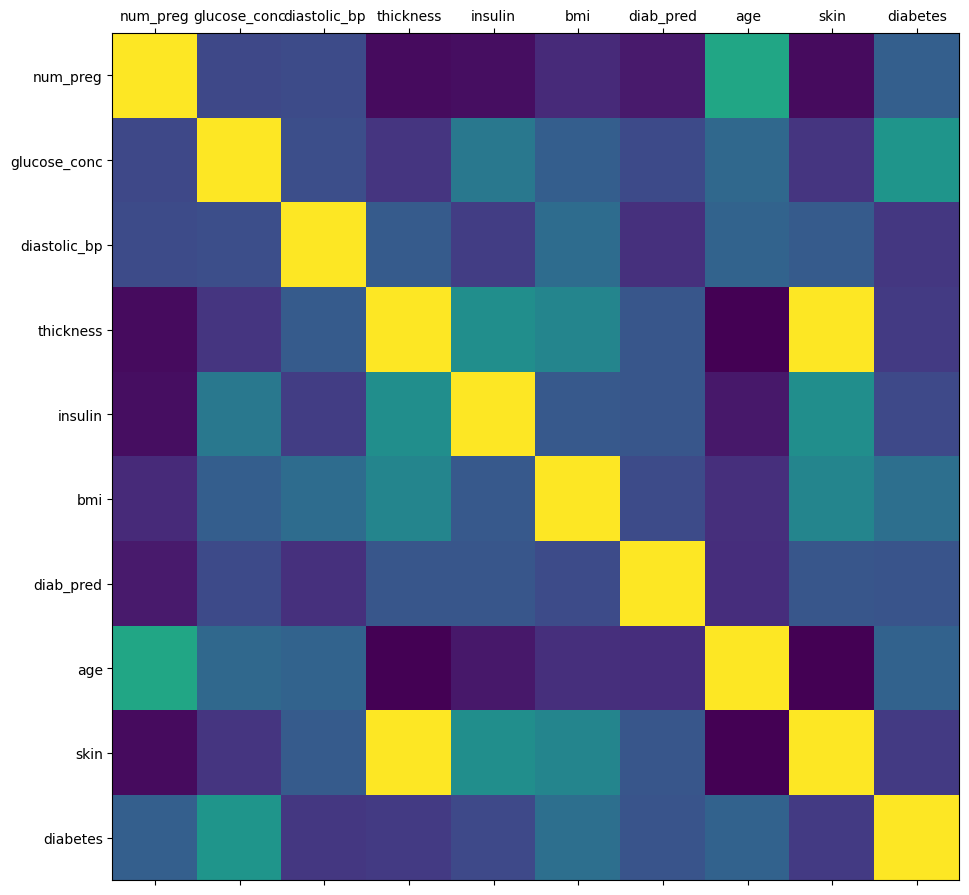

In [8]:
plot_corr(df)

In [9]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [10]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


The skin and thickness columns are correlated 1 to 1.  Dropping the skin column

In [11]:
del df['skin']

In [12]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


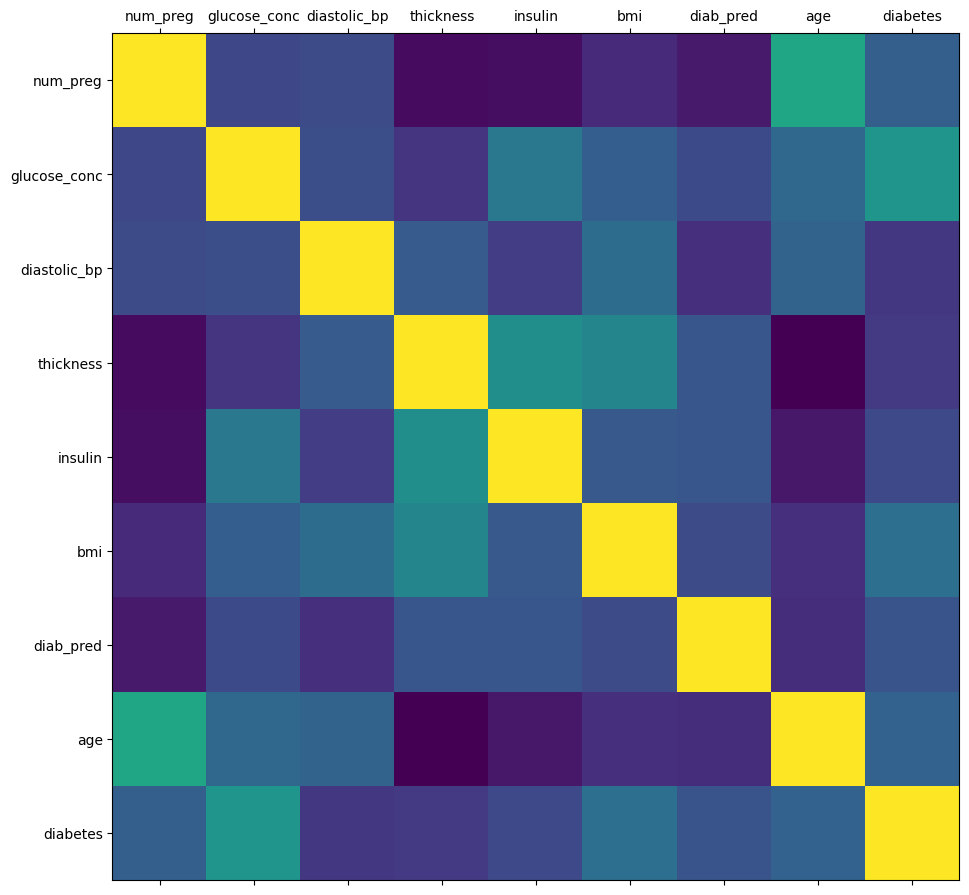

In [13]:
plot_corr(df)

## Mold Data

### Data Types

Inspect data types to see if there are any issues.  Data should be numeric.

In [14]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change diabetes from boolean to integer, True=1, False=0

In [15]:
diabetes_map = {True : 1, False : 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

Verify that the diabetes data type has been changed.

In [16]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check for null values

In [17]:
df.isnull().values.any()

False

No obvious null values.

### Check true/false ratio

In [20]:
total = len(df)
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])

true_percentage = (num_true / total) * 100
false_percentage = (num_false / total) * 100

print(f"Number of True cases: {num_true} ({true_percentage:.2f}%)")
print(f"Number of False cases: {num_false} ({false_percentage:.2f}%)")

Number of True cases: 268 (34.90%)
Number of False cases: 500 (65.10%)


### Splitting the data
70% for tranining, 30% for testing

In [24]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values    # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)
                            # test_size = 0.3 is 30%, 42 is the answert to everything (any const number can be used here :))

We check to ensure we have the desired 70% train, 30% test split of the data

In [25]:
# Calculate the percentage of data in the training set
train_percentage = (len(X_train) / len(df)) * 100
print(f"{train_percentage:.2f}% in training set")

# Calculate the percentage of data in the test set
test_percentage = (len(X_test) / len(df)) * 100
print(f"{test_percentage:.2f}% in test set")

69.92% in training set
30.08% in test set


## Verifying predicted value was split correctly

In [27]:
# Original distribution in the entire dataset
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1]) / len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0]) / len(df.index)) * 100.0))
print("")

# Training set distribution
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train == 1]), (len(y_train[y_train == 1]) / len(y_train)) * 100.0))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train == 0]), (len(y_train[y_train == 0]) / len(y_train)) * 100.0))
print("")

# Test set distribution
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test == 1]), (len(y_test[y_test == 1]) / len(y_test)) * 100.0))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test == 0]), (len(y_test[y_test == 0]) / len(y_test)) * 100.0))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


### Post-split Data Preparation

#### Hidden Missing Values

In [30]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Are these 0 values possible? <br>
How many rows have unexpected 0 values?


In [31]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


Impute with the mean


In [33]:
from sklearn.impute import SimpleImputer

# Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)  

## Training Initial Algorithm - Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB()

 ### Performance on Traning Data

In [38]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy 
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7654



### Perfomance on Testing Data

In [39]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.7229


#### Metrics

In [42]:
# Importing necessary metrics module from scikit-learn library
from sklearn import metrics

# Displaying the Confusion Matrix
# A confusion matrix is a table that is used to describe the performance of a classification model 
# on a set of data for which the true values are known.
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

# Displaying the Classification Report
# The classification report displays the precision, recall, F1, and support scores for the model.
# - Precision: The ability of the classifier not to label a negative sample as positive. 
#              It's the ratio of correctly predicted positive observations to the total predicted positives.
# - Recall (Sensitivity): The ability of the classifier to find all the positive samples.
# - F1-Score: The weighted average of Precision and Recall. It tries to find the balance between precision and recall.
# - Support: The number of occurrences of each class in the true data.
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))


Confusion Matrix
[[117  34]
 [ 30  50]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       151
           1       0.60      0.62      0.61        80

    accuracy                           0.72       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.72      0.72       231



### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42) # Create random forest object
rf_model.fit(X_train, y_train.ravel())


RandomForestClassifier(random_state=42)

### Predict Training Data

In [46]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 1.0000


### Predict Test Data

In [49]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7446


In [50]:
print(metrics.confusion_matrix(y_test, rf_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[123  28]
 [ 31  49]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231



In [53]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7446
[[128  23]
 [ 36  44]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



Setting regularization parameter

1st max value of 0.613 occured at C=1.400


Text(0, 0.5, 'recall score')

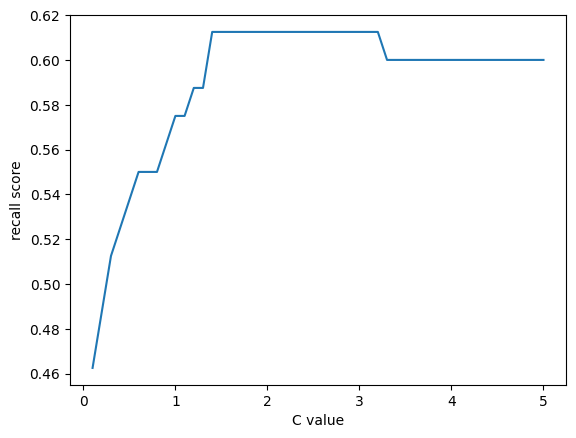

In [56]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, solver='liblinear')
    lr_model_loop.fit(X_train, y_train.ravel()) 
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

    